In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [2]:
from source.utils import *
from source.classes import *
import pickle
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from tqdm import tqdm_notebook as tqdm

In [3]:
with open('../../Desktop/DLC_social_1/DLC_social_1_exp_conditions.pickle', 'rb') as handle:
    Treatment_dict = pickle.load(handle)

In [4]:
#Which angles to compute?
bp_dict = {'B_Nose':['B_Left_ear','B_Right_ear'],
          'B_Left_ear':['B_Nose','B_Right_ear','B_Center','B_Left_flank'],
          'B_Right_ear':['B_Nose','B_Left_ear','B_Center','B_Right_flank'],
          'B_Center':['B_Left_ear','B_Right_ear','B_Left_flank','B_Right_flank','B_Tail_base'],
          'B_Left_flank':['B_Left_ear','B_Center','B_Tail_base'],
          'B_Right_flank':['B_Right_ear','B_Center','B_Tail_base'],
          'B_Tail_base':['B_Center','B_Left_flank','B_Right_flank']}

In [6]:
DLC_social_1 = project(path='../../Desktop/DLC_social_1/',#Path where to find the required files
                   smooth_alpha=0.1,                    #Alpha value for exponentially weighted smoothing
                   distances=['B_Center','B_Nose','B_Left_ear','B_Right_ear','B_Left_flank',
                              'B_Right_flank','B_Tail_base'],
                   ego='B_Center',
                   angles=True,
                   connectivity=bp_dict,
                   arena='circular',                  #Type of arena used in the experiments
                   arena_dims=[380],                  #Dimensions of the arena. Just one if it's circular
                   video_format='.mp4',
                   table_format='.h5',
                   exp_conditions=Treatment_dict)

In [7]:
%%time
DLC_social_1_coords = DLC_social_1.run(verbose=True)
print(DLC_social_1_coords)
type(DLC_social_1_coords)

Loading trajectories...
Smoothing trajectories...
Computing distances...
Computing angles...
Done!
Coordinates of 47 videos across 4 conditions
CPU times: user 5min 9s, sys: 1.99 s, total: 5min 11s
Wall time: 46.4 s


source.classes.coordinates

In [93]:
%%time
ptest = DLC_social_1_coords.get_coords(center=True, polar=True)
ptest._type

CPU times: user 15.6 s, sys: 117 ms, total: 15.7 s
Wall time: 15.7 s


'coords'

In [9]:
%%time
dtest = DLC_social_1_coords.get_distances()
dtest._type

CPU times: user 23 µs, sys: 1e+03 ns, total: 24 µs
Wall time: 27.2 µs


'dists'

In [10]:
%%time
atest = DLC_social_1_coords.get_angles(degrees=False)
atest._type

CPU times: user 25 µs, sys: 1 µs, total: 26 µs
Wall time: 26.9 µs


'angles'

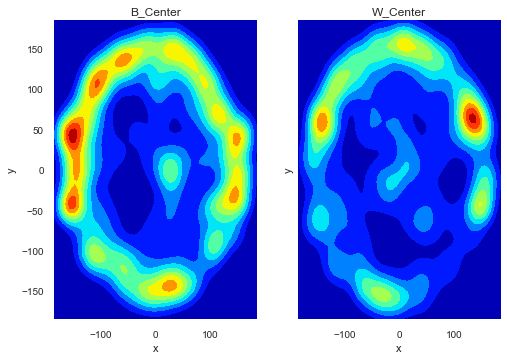

In [13]:
ptest.plot_heatmaps(['B_Center', 'W_Center'], i=2)

In [110]:
pca = ptest.pca(4, 1000)

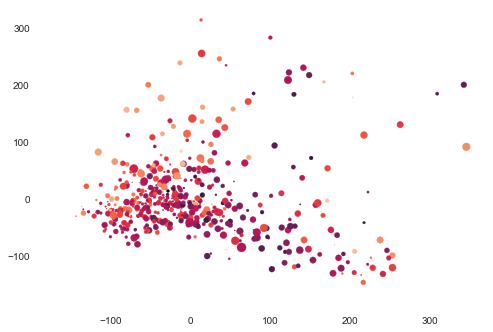

In [111]:
plt.scatter(*pca[0].T)
plt.show()